<h1> Introduction to text mining </h1>
<b> Polytechnique Montréal - 20/02/2018</b> <br>
<i> Mehdi Miah </i> <br>

### Aim : how to represent words, documents and corpus in a structured data ?

<b> Summary </b> <br>
1. [Setup](#setup)
2. [Open files](#open)
3. [Data processing](#processing)
   1. [Lowerization](#lowerization)
   2. [Tokenization](#tokenization)
   3. [Spellchecking](#spellchecking)
   4. [Remove stop_words](#stopwords)
   5. [Stemmer or lemmatizer](#stemlemm)
   6. [Recap](#recap)
4. [Let's count the number of occurences](#occurences)
   1. [Top words](#topwords)
   2. [Cloudwords](#cloudwords)
5. [First method : TF-IDF](#tfidf)
6. [Let's digress : how to represent a high-dimensional vector in a 2D space ?](#visual)
   1. [Principal component analysis (PCA)](#pca)
   2. [t-distributed Stochastic Neighbor Embedding (t-SNE)](#tsne)
7. [Second method : LSA](#lsa)


# 1-Setup <a name="setup"></a>

In [1]:
#import some common libraries

import os
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

# set working directory
os.chdir("C:/Users/Mehdi/Documents/Télécom SudParis/Stage international/Introduction au text mining")

#access to the data
path_to_data = "./data/inauguration_speech/"

# path where we will store the results
path_to_results = "./results/"

All data are available on http://www.presidency.ucsb.edu/inaugurals.php <br>
There are 26 speechs : from Wilson (1917) to Trump (2017).

# 2-Open files <a name="open"></a>

In [2]:
# list of all files
list_files = os.listdir(path_to_data)

# open all files
list_speech_input = []
for file in list_files : 
    text = open(path_to_data + file, 'r', encoding = "utf-8")
    list_speech_input.append(text.read())
    
# politics color
# Blue = Democrat | Red = Republican
list_color = ["blue", "red", "red", "red", "blue", "blue", "blue", "blue",
             "blue", "red", "red", "blue", "blue", "red", "red", "blue",
             "red", "red", "red", "blue", "blue", "red", "red", "blue",
              "blue", "red"]

print(list_files)

['1917_Wilson.txt', '1921_Harding.txt', '1925_Coolidge.txt', '1929_Hoover.txt', '1933_Roosevelt.txt', '1937_Roosevelt.txt', '1941_Roosevelt.txt', '1945_Roosevelt.txt', '1949_Truman.txt', '1953_Eisenhower.txt', '1957_Eisenhower.txt', '1961_Kennedy.txt', '1965_Johnson.txt', '1969_Nixon.txt', '1973_Nixon.txt', '1977_Carter.txt', '1981_Reagan.txt', '1985_Reagan.txt', '1989_Bush.txt', '1993_Clinton.txt', '1997_Clinton.txt', '2001_Bush.txt', '2005_Bush.txt', '2009_Obama.txt', '2013_Obama.txt', '2017_Trump.txt']


In [3]:
# display Trump's speech (the last one)
trump = list_speech_input[-1]
print(trump)

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.

We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done.

Every 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.

Today's ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.

For too long, a 

# 3-Data processing <a name="processing"></a>

In this part, there are several steps : 

- Lowerization <br>
- Tokenisation <br>
- Word correction (optional)<br>
- StopWords <br>
- Stemisation or Lemmatisation <br>

## 3.A-Lowerization <a name="lowerization"></a>

In [4]:
# Initial text (step 0)
trump_begin = trump[0:465] #first two paragraphs
print(trump_begin) 

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.

We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done.


In [5]:
# Step 1 : Lowerisation
trump_lower = trump_begin.lower()
print(trump_lower)

chief justice roberts, president carter, president clinton, president bush, president obama, fellow americans, and people of the world: thank you.

we, the citizens of america, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. together, we will determine the course of america and the world for many, many years to come. we will face challenges, we will confront hardships, but we will get the job done.


## 3.B-Tokenization <a name="tokenization"></a>

In [6]:
# Step 2 : Tokenization
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
# Some examples to show the effet of tokenization on some special words
list_words = ['UN', 'U.N.', 'New York', "Prud'homme", 'one-man-show', 'Hewlett-Packard',
             '2018/02/20', '20th February 2018', '(+33) 565455', 'Louis de Funès']
for word in list_words :
    print(tokenizer.tokenize(word))

['UN']
['U', 'N']
['New', 'York']
['Prud', 'homme']
['one', 'man', 'show']
['Hewlett', 'Packard']
['2018', '02', '20']
['20th', 'February', '2018']
['33', '565455']
['Louis', 'de', 'Funès']


In [8]:
# Tokenisation on Trump's speechs
tokens_trump = tokenizer.tokenize(trump_lower)
print(tokens_trump)

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'and', 'people', 'of', 'the', 'world', 'thank', 'you', 'we', 'the', 'citizens', 'of', 'america', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', 'together', 'we', 'will', 'determine', 'the', 'course', 'of', 'america', 'and', 'the', 'world', 'for', 'many', 'many', 'years', 'to', 'come', 'we', 'will', 'face', 'challenges', 'we', 'will', 'confront', 'hardships', 'but', 'we', 'will', 'get', 'the', 'job', 'done']


## 3.C-Spellchecking <a name="spellchecking"></a>

No correction needed here (step 3 is optional)

## 3.D-Remove stop_words <a name="stopwords"></a>

In [9]:
# Step 4 : stopwords removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #putting it in a set makes computation faster =)

In [10]:
# All words in the stop_words
# NB : it is possible to remove or to add other words !
print(sorted(stop_words)) # words in stop_words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'has', 'hasn', 'have', 'haven', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', 'more', 'most', 'mustn', 'my', 'myself', 'needn', 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'she', 'should', 'shouldn', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'v

In [11]:
# Let's remove these words from the text
filtered_trump = [w for w in tokens_trump if not w in stop_words]
print(filtered_trump)

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'people', 'world', 'thank', 'citizens', 'america', 'joined', 'great', 'national', 'effort', 'rebuild', 'country', 'restore', 'promise', 'people', 'together', 'determine', 'course', 'america', 'world', 'many', 'many', 'years', 'come', 'face', 'challenges', 'confront', 'hardships', 'get', 'job', 'done']


## 3.E-Stemmer or lemmatizer <a name="stemlemm"></a>

In [12]:
# Step 5 : Stemisation or Lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
 
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

In [13]:
# Some examples
list_words = ['boats', 'studying', 'citizens', 'studied', 'us'] 
for word in list_words : 
    print("Stem %s: %s" % (word, stemmer.stem(word)))
    print("Lemmatise %s: %s" % (word, lemmatiser.lemmatize(word)))
    print("Lemmatise pos='v' %s: %s\n" % (word, lemmatiser.lemmatize(word, pos="v")))  

Stem boats: boat
Lemmatise boats: boat
Lemmatise pos='v' boats: boat

Stem studying: studi
Lemmatise studying: studying
Lemmatise pos='v' studying: study

Stem citizens: citizen
Lemmatise citizens: citizen
Lemmatise pos='v' citizens: citizens

Stem studied: studi
Lemmatise studied: studied
Lemmatise pos='v' studied: study

Stem us: us
Lemmatise us: u
Lemmatise pos='v' us: us



In [14]:
# Stemmer on Trump's speech
stem_trump = [stemmer.stem(w) for w in filtered_trump ]
print(stem_trump)

['chief', 'justic', 'robert', 'presid', 'carter', 'presid', 'clinton', 'presid', 'bush', 'presid', 'obama', 'fellow', 'american', 'peopl', 'world', 'thank', 'citizen', 'america', 'join', 'great', 'nation', 'effort', 'rebuild', 'countri', 'restor', 'promis', 'peopl', 'togeth', 'determin', 'cours', 'america', 'world', 'mani', 'mani', 'year', 'come', 'face', 'challeng', 'confront', 'hardship', 'get', 'job', 'done']


In [15]:
# Lemmatize on Trump's speech
lemm_trump = [lemmatiser.lemmatize(w, pos="v") for w in filtered_trump ]
print(lemm_trump)

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'people', 'world', 'thank', 'citizens', 'america', 'join', 'great', 'national', 'effort', 'rebuild', 'country', 'restore', 'promise', 'people', 'together', 'determine', 'course', 'america', 'world', 'many', 'many', 'years', 'come', 'face', 'challenge', 'confront', 'hardships', 'get', 'job', 'do']


Now, it would more efficient to have a function for the pre-processing : 

## 3.F-Recap <a name="recap"></a>

In [16]:
def preprocess(text, stop_words, simplify, verbose = False):
    '''
    text : text which will be formated
    stop_words : set of all forbidden words
    simplify : either 'stemmer', or 'lemmatize'
    verbose : boolean, if True, display the lengths of the list of words (before removing stop_words)
    
    returns the formated text representing the initial input
    '''
    
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    if verbose:
        print("There are " + str(len(tokens)) + " words.")
    
    result = [w for w in tokens if not w in stop_words]
    
    #Lemmatisation or stemmization
    if simplify == "lemmatize" :
        result = [lemmatiser.lemmatize(w) for w in result]
    elif simplify == "stemmer" :
        result = [stemmer.stem(w) for w in result]

    return " ".join(result)

In [17]:
# Loop for format all speechs
list_speech_output = []
for speech in list_speech_input : 
    output = preprocess(speech, stop_words, simplify = "lemmatize", verbose = False)
    list_speech_output.append(output)

# Formated Trump's speech    
print(list_speech_output[-1])

chief justice robert president carter president clinton president bush president obama fellow american people world thank citizen america joined great national effort rebuild country restore promise people together determine course america world many many year come face challenge confront hardship get job done every 4 year gather step carry orderly peaceful transfer power grateful president obama first lady michelle obama gracious aid throughout transition magnificent thank today ceremony however special meaning today merely transferring power one administration another one party another transferring power washington dc giving back people long small group nation capital reaped reward government people borne cost washington flourished people share wealth politician prospered job left factory closed establishment protected citizen country victory victory triumph triumph celebrated nation capital little celebrate struggling family across land change starting right right moment moment belo

# 4-Let's count the number of occurences <a name="occurences"></a>

## 4.A-Top words <a name="topwords"></a>

In [18]:
from collections import Counter

What are the words the most said in each speech ?

In [19]:
for i in range(len(list_files)):
    name = list_files[i]
    speech = list_speech_output[i].split(' ')
    print('%s \t %.0f words : %s' % (name, len(speech), Counter(speech).most_common(5)))

1917_Wilson.txt 	 663 words : [('upon', 13), ('shall', 9), ('purpose', 9), ('nation', 9), ('u', 8)]
1921_Harding.txt 	 1717 words : [('world', 28), ('must', 23), ('war', 15), ('america', 15), ('government', 14)]
1925_Coolidge.txt 	 1871 words : [('country', 20), ('nation', 17), ('must', 17), ('great', 16), ('government', 16)]
1929_Hoover.txt 	 1857 words : [('government', 33), ('law', 23), ('people', 20), ('upon', 18), ('nation', 18)]
1933_Roosevelt.txt 	 921 words : [('national', 9), ('must', 8), ('may', 8), ('people', 8), ('helped', 7)]
1937_Roosevelt.txt 	 922 words : [('government', 16), ('people', 11), ('nation', 11), ('power', 10), ('good', 8)]
1941_Roosevelt.txt 	 635 words : [('nation', 15), ('life', 11), ('know', 10), ('democracy', 9), ('spirit', 9)]
1945_Roosevelt.txt 	 255 words : [('shall', 7), ('peace', 6), ('learned', 5), ('men', 4), ('way', 4)]
1949_Truman.txt 	 1140 words : [('nation', 24), ('world', 23), ('people', 21), ('peace', 15), ('freedom', 13)]
1953_Eisenhower.t

The character 'u' refers to 'us', after the lemmatize step ...

# 4.B-Cloudwords <a name="cloudwords"></a>

One way to represent the top words if the cloudword. The more a word is used in a text, the bigger it appears.

In [20]:
from wordcloud import WordCloud

def show_wordcloud(data, name, title = None) :
    wordcloud = WordCloud(
        background_color='white',
        max_words=50,
        max_font_size=40, 
        collocations = False, #no bigrams
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 11))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=35)
        fig.subplots_adjust(top=0.9)

    plt.imshow(wordcloud)
    #plt.show()
    plt.savefig(path_to_results + name)
    plt.close(fig)

In [21]:
# Save wordcloud for each speech
for i in range(len(list_speech_output)) :
    name = list_files[i].replace('.txt','')
    year, president = name.split('_')
    title = "Wordcloud of " + president + " in " + year
    show_wordcloud(list_speech_output[i], name, title)

# 5-First method : TF-IDF <a name="tfidf"></a>

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', norm = 'l2')

In [23]:
tfidf_matrix = tf.fit_transform(list_speech_output)

C:\Users\Mehdi\Anaconda3\envs\py35\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [24]:
# Number of rows and columns
tfidf_matrix.shape

(26, 4922)

Advice : it is possible to reduce the number of column by removing rare words (not done here).

In [25]:
# Display only the first columns <=> only the first words of the vocabulary
print(tf.get_feature_names()[0:99])

['13', '16', '1776', '1787', '1789', '1800', '1826', '18th', '1917', '1919', '1933', '1941', '1945', '1972', '1980', '1984', '19th', '20', '200', '200th', '2017', '20th', '21st', '225', '25', '30', '40', '400', '48', '50', '50th', '60', '71st', 'abandon', 'abandoned', 'abandonment', 'abdicated', 'abhorring', 'abiding', 'ability', 'able', 'abnormal', 'abolish', 'abolished', 'abound', 'abounding', 'abraham', 'abreast', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorbing', 'abstraction', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'accept', 'acceptance', 'accepted', 'accepts', 'accessible', 'accidental', 'acclaim', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accord', 'accordance', 'accordingly', 'account', 'accountability', 'accounted', 'accrue', 'accumulate', 'accurately', 'achieve', 'achieved', 'achievement', 'acquire', 'acrimony', 'across', 'act', 'acted', 'acting', 'action', 'active', 'actively', 'activism', 'activity',

From the matrix TF-IDF, it is possible to calculate the similarities between each speech. For that, one will use the cosine similarity.

In [26]:
#Metric between one speech and the others
from sklearn.metrics.pairwise import linear_kernel
 
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [(index, cosine_similarities[index]) for index in related_docs_indices][0:top_n]

In [27]:
# Which speech is the closest for Trump's one ?
for index, score in find_similar(tfidf_matrix, 25):
       print(score, list_files[index])

0.34158761019840417 1997_Clinton.txt
0.32274781132531666 1993_Clinton.txt
0.3036241078991519 2009_Obama.txt
0.29935932718933445 2013_Obama.txt
0.2981927169424611 1989_Bush.txt


The closest speech of Trump's (about the vocabulary, not the idea !!) is Clinton 1997.

# 6-Let's digress : how to represent a high-dimensional vector in a 2D space ? <a name="visual"></a>

## 6.A-Principal component analysis (PCA) <a name="pca"></a>

In [28]:
# import PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)

In [29]:
# Apply PCA
pca.fit(tfidf_matrix.todense())
tfidf_pca = pca.transform(tfidf_matrix.todense())

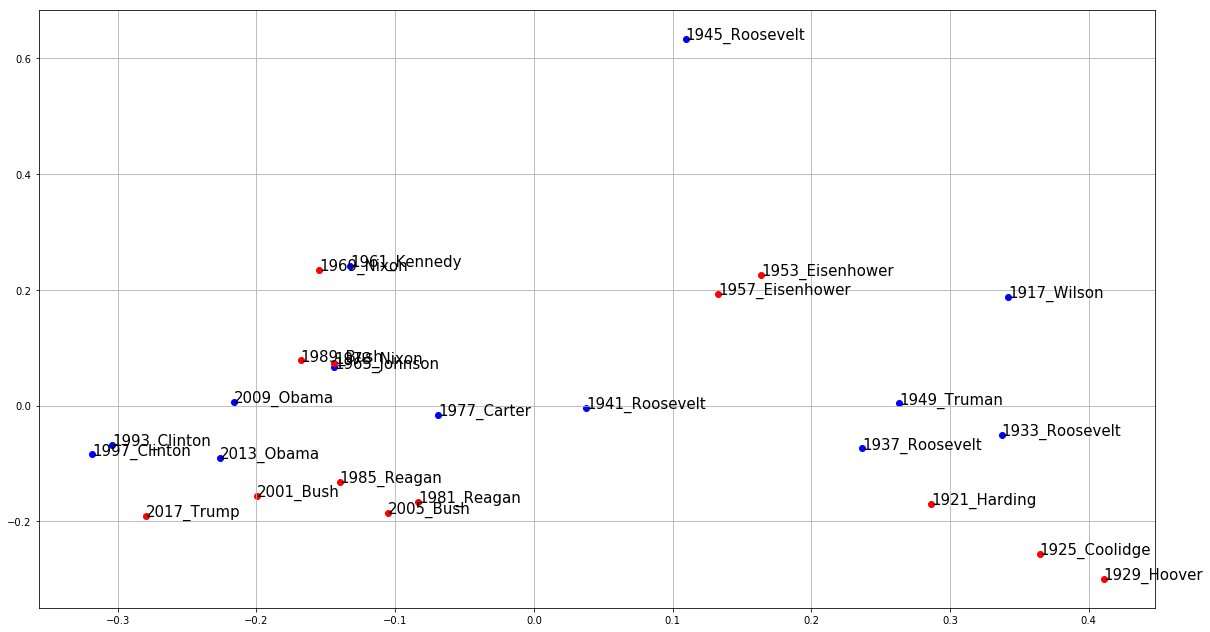

In [30]:
# Plot PCA on the two first dimension
fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(tfidf_pca[i, 0], tfidf_pca[i, 1], c = list_color[i])
    ax.annotate(name, (tfidf_pca[i, 0], tfidf_pca[i, 1]), size = 15)
    
ax.grid(True)

Some funny results : <br>
    - Obama (2009) is close to Obama (2013) ; same results with Clinton, Bush Jr, Eisenhower
    - evolution from the right to the left over years
    - Trump is not an outlier
    - there are not clusters of Republicans and Democrats

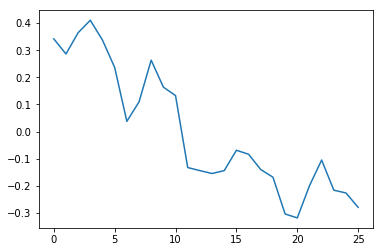

In [31]:
# We can notice the change of the vocabulary through the years !
# It is along the abscisses
plt.plot([tfidf_pca[i, 0] for i in range(len(list_files))])

## 6.B-t-distributed Stochastic Neighbor Embedding (t-SNE) <a name="tsne"></a>

Look for this paper : <br>
<b> L.J.P. van der Maaten and G.E. Hinton</b>, Visualizing High-Dimensional Data Using t-SNE, <i>Journal of Machine Learning Research</i> 9(Nov):2579-2605, 2008

In [32]:
from sklearn.manifold import TSNE

In [33]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=1000)
tfidf_tsne = tsne.fit_transform(tfidf_matrix.todense())

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 0.186054
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.991787
[t-SNE] Error after 350 iterations: 0.991787
t-SNE done! Time elapsed: 0.4061441421508789 seconds


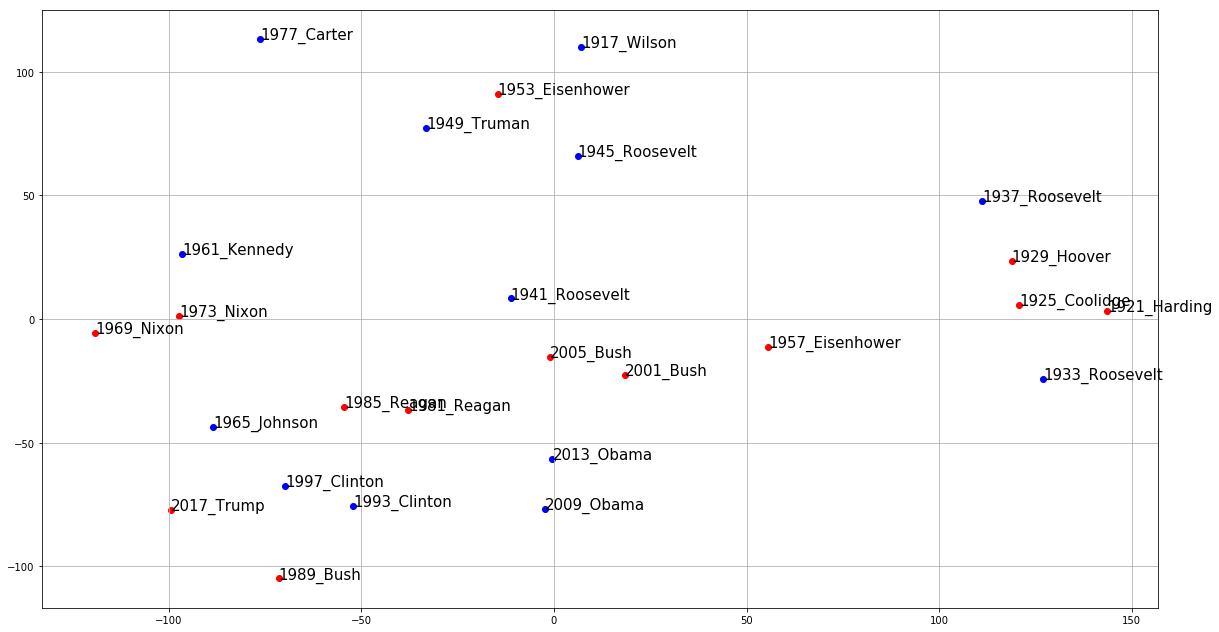

In [34]:
# Plot t-SNE one the two first dimensions (not relevant here)
fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(tfidf_tsne[i, 0], tfidf_tsne[i, 1], c = list_color[i])
    ax.annotate(name, (tfidf_tsne[i, 0], tfidf_tsne[i, 1]), size = 15)
    
ax.grid(True)

Here, t-SNE does not give more information ...

# 7-Second method : LSA <a name="lsa"></a>

In [35]:
u,sigma,vt = np.linalg.svd(tfidf_matrix.todense())

<Container object of 3 artists>

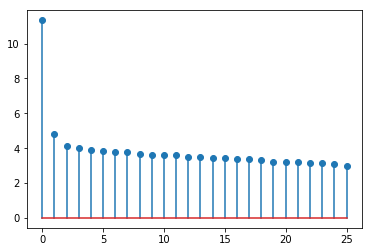

In [36]:
# Display the elements on the diagonal of the matrix sigma
plt.stem(range(len(sigma)), sigma/sum(sigma)*100)

In [37]:
# We only keep the first elements of sigma
nb_rank = 12

# One reconstruct the matrix
reconst_matrix = np.dot(u[:,:nb_rank],np.dot(np.diag(sigma[:nb_rank]),vt[:nb_rank,:]))

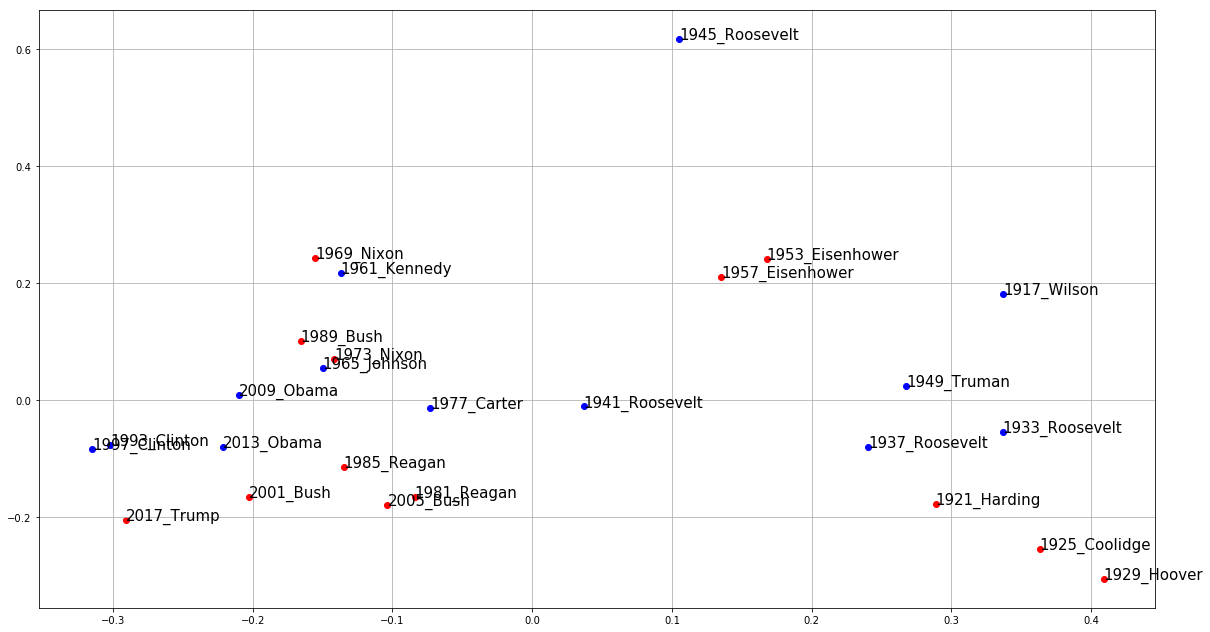

In [38]:
# LSA & PCA

pca.fit(reconst_matrix)
lsa_pca = pca.transform(reconst_matrix)

fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(lsa_pca[i, 0], lsa_pca[i, 1], c = list_color[i])
    ax.annotate(name, (lsa_pca[i, 0], lsa_pca[i, 1]), size = 15)
    
ax.grid(True)

The PCA dataviz with LSA is similar to the one obtain with the TF-IDF model.

In [39]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=1000)
lsa_tsne = tsne.fit_transform(reconst_matrix)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 0.154719
[t-SNE] KL divergence after 100 iterations with early exaggeration: 2.110625
[t-SNE] Error after 375 iterations: 2.110625
t-SNE done! Time elapsed: 0.29570960998535156 seconds


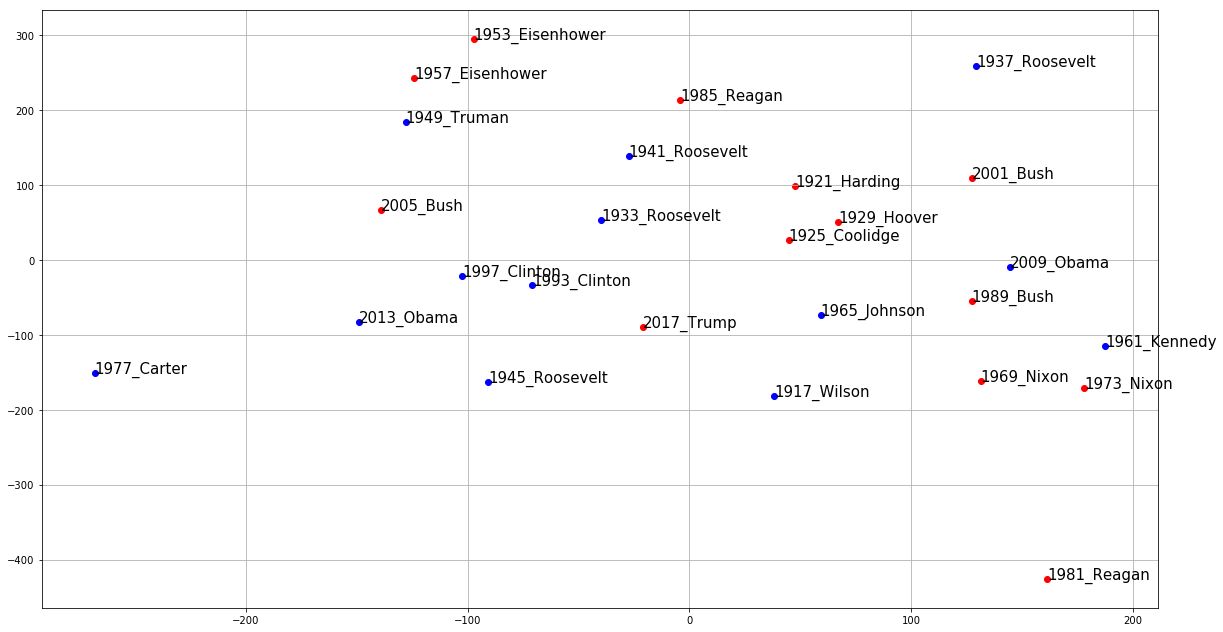

In [40]:
fig, ax = plt.subplots(1, figsize=(20, 11))
for i, name in enumerate(list_files):
    name = name[:-4]
    ax.scatter(lsa_tsne[i, 0], lsa_tsne[i, 1], c = list_color[i])
    ax.annotate(name, (lsa_tsne[i, 0], lsa_tsne[i, 1]), size = 15)
    
ax.grid(True)

t-SNE does not give better results ...

However, t-SNE is <b>REALLY</b> impressive when used with embeddings.